In [1]:
import pandas as pd

In [9]:
url = 'https://github.com/piotrgradzinski/dap_20230114/raw/main/day_8_pgg/sales_furniture2.csv'
df = pd.read_csv(url, sep=';', encoding='utf-8', index_col='no', parse_dates=['transaction_date'])
df

,transaction_date,city,shop,category,product,price,quantity
no,,,,,,,
1,2014-11-23,London,Newbold Accountancy Services,furniture,desk,149.99,4
2,2017-05-07,Berlin,Quality Boiler Repairs,school equipment,blackboard,590.00,2
3,2017-05-05,Cracow,Richards Textiles,school and office equipment,pen,0.99,51
4,2016-10-19,Cracow,Sterling Cameras,school equipment,sponge,4.00,250
5,2016-04-08,Krakow,Noakes Paper Products,furniture,desk,149.99,9
...,...,...,...,...,...,...,...
9996,2016-05-22,Paris,Wright Sporting Goods,school and office equipment,punch,7.50,178
9997,2016-11-19,Cracow,Richards Textiles,furniture,desk,149.99,7
9998,2016-09-30,London,Newbold Accountancy Services,school and office equipment,pen,1.49,87


In [11]:
df.describe()

,price,quantity
count,10000.000000,10000.000000
mean,107.324051,82.422900
std,181.729567,109.260099
min,0.990000,1.000000
25%,4.000000,6.000000
50%,7.500000,27.000000
75%,149.990000,128.000000
max,590.000000,593.000000


In [12]:
df.dtypes

transaction_date    datetime64[ns]
city                        object
shop                        object
category                    object
product                     object
price                      float64
quantity                     int64
dtype: object

In [14]:
df['total'] = df.price * df.quantity
df

,transaction_date,city,shop,category,product,price,quantity,total
no,,,,,,,,
1,2014-11-23,London,Newbold Accountancy Services,furniture,desk,149.99,4,599.96
2,2017-05-07,Berlin,Quality Boiler Repairs,school equipment,blackboard,590.00,2,1180.00
3,2017-05-05,Cracow,Richards Textiles,school and office equipment,pen,0.99,51,50.49
4,2016-10-19,Cracow,Sterling Cameras,school equipment,sponge,4.00,250,1000.00
5,2016-04-08,Krakow,Noakes Paper Products,furniture,desk,149.99,9,1349.91
...,...,...,...,...,...,...,...,...
9996,2016-05-22,Paris,Wright Sporting Goods,school and office equipment,punch,7.50,178,1335.00
9997,2016-11-19,Cracow,Richards Textiles,furniture,desk,149.99,7,1049.93
9998,2016-09-30,London,Newbold Accountancy Services,school and office equipment,pen,1.49,87,129.63


In [15]:
df.groupby('city').agg({
    'price': 'mean',
    'quantity': 'mean',
    'total': ['min', 'max', 'mean', 'median', 'sum']
})

price    quantity total                                  \
                 mean        mean   min      max         mean    median   
city                                                                      
Barcelona  109.107484   93.093060  4.00  2399.84   933.403549   803.405   
Berlin      99.770781   46.606946  1.49  1199.92   473.769629   439.530   
Cracow     106.497268   69.496627  0.99  1799.88   681.153642   590.000   
Krakow     114.927644   91.929394  0.99  2399.84   906.815142   759.000   
London     104.789839   73.206618  2.98  1799.88   697.565722   599.960   
Paris      104.161344  117.915625  2.97  2999.80  1137.746938  1029.525   
Rome       110.073677   23.512390  0.99   599.96   262.641783   212.000   
Warszawa   109.090265  144.179104  0.99  3599.76  1349.214138  1201.960   

                       
                  sum  
city                   
Barcelona  1183555.70  
Berlin      600266.12  
Cracow      807848.22  
Krakow     1181580.13  
London      864283.93  
Paris      1456316.08  
Rome        328564.87  
Warszawa   1627152.25

In [16]:
df.groupby(['city', 'shop', 'category', 'product']).agg({
    'total': sum
})

total
city      shop                 category                    product                
Barcelona On Time Kitchens     furniture                   desk           80694.62
                                                           swivel chair   59202.00
                               school and office equipment pen            10035.14
                                                           plasticine     12767.30
                                                           punch          13380.00
...                                                                            ...
Warszawa  Salisbury Promotions school and office equipment plasticine     49657.92
                                                           punch          63262.50
                               school equipment            blackboard    133930.00
                                                           chalk          84350.00
                                                           sponge         80804.00

[200 rows x 1 columns]

# Pivot / pivot table

Pivot allows us to group by many criterias and present the result in 2 dimensions.

In [17]:
df.groupby(['city', 'category']).agg({
    'total': sum
})

total
city      category                              
Barcelona furniture                    573400.54
          school and office equipment  167886.16
          school equipment             442269.00
Berlin    furniture                    284102.02
          school and office equipment   90556.10
          school equipment             225608.00
Cracow    furniture                    349980.02
          school and office equipment  116231.20
          school equipment             341637.00
Krakow    furniture                    545625.42
          school and office equipment  157089.71
          school equipment             478865.00
London    furniture                    384492.65
          school and office equipment  142505.28
          school equipment             337286.00
Paris     furniture                    696108.90
          school and office equipment  237587.18
          school equipment             522620.00
Rome      furniture                    141789.71
          school and office equipment   44506.16
          school equipment             142269.00
Warszawa  furniture                    749340.47
          school and office equipment  262164.78
          school equipment             615647.00

In [18]:
df.category.unique()

array(['furniture', 'school equipment', 'school and office equipment'],
      dtype=object)

We can use [`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html) to present those results in a 2 dimensional way, where one criterion will be presented in rows and the second one in columns.

In [19]:
df.pivot_table(index=['city'], columns=['category'], values=['total'], aggfunc=['sum'])

sum                                             
               total                                             
category   furniture school and office equipment school equipment
city                                                             
Barcelona  573400.54                   167886.16         442269.0
Berlin     284102.02                    90556.10         225608.0
Cracow     349980.02                   116231.20         341637.0
Krakow     545625.42                   157089.71         478865.0
London     384492.65                   142505.28         337286.0
Paris      696108.90                   237587.18         522620.0
Rome       141789.71                    44506.16         142269.0
Warszawa   749340.47                   262164.78         615647.0

In [27]:
# What is percentage of total sales value for each city and product category

total_sales = df.total.sum()

def total_percentage(data):
    total_data = data.sum()
    return total_data * 100.0 / total_sales

df.pivot_table(index=['city'], columns=['category'], values=['total'], aggfunc=[total_percentage])

total_percentage                                             
                     total                                             
category         furniture school and office equipment school equipment
city                                                                   
Barcelona         7.123371                    2.085654         5.494320
Berlin            3.529407                    1.124981         2.802735
Cracow            4.347812                    1.443943         4.244166
Krakow            6.778320                    1.951530         5.948953
London            4.776563                    1.770347         4.190113
Paris             8.647780                    2.951552         6.492523
Rome              1.761458                    0.552901         1.767412
Warszawa          9.309078                    3.256880         7.648200

In [28]:
df.pivot_table(index=['city', 'shop'], columns=['category', 'product'], values='total', aggfunc=['sum', 'mean'])

sum               \
category                                furniture                
product                                      desk swivel chair   
city      shop                                                   
Barcelona On Time Kitchens               80694.62      59202.0   
          Rathbone Double Glazing        80994.60      77073.0   
          Riverside Off Road Vehicles    67945.47      71898.0   
          Super Memorabilia              62245.85      73347.0   
Berlin    Billingham Workshops           46496.90      37881.0   
          On Top Workshops               34797.68      33189.0   
          Pringle Cycles                 34197.72      36294.0   
          Quality Boiler Repairs         34197.72      27048.0   
Cracow    Grange Locksmiths              48296.78      43815.0   
          Richards Textiles              50396.64      37674.0   
          Sterling Cameras               40347.31      48300.0   
          Valley Coaches                 40647.29      40503.0   
Krakow    Grady Recycling                92843.81      82041.0   
          Jeffries Logistics             97343.51      81006.0   
          Noakes Paper Products         118492.10      73899.0   
London    Ashton Electronics             76494.90      53406.0   
          Haddow Camping Supplies        73195.12      64998.0   
          Newbold Accountancy Services   65545.63      50853.0   
Paris     Holt Packaging                160489.30     114264.0   
          Summit Cash & Carry           110692.62      98463.0   
          Wright Sporting Goods         120291.98      91908.0   
Rome      Khan Cabs                      39747.35      27324.0   
          Pearce Printing                39597.36      35121.0   
Warszawa  North Point Services          219135.39     161184.0   
          Salisbury Promotions          178788.08     190233.0   

                                                                               \
category                               school and office equipment              
product                                                        pen plasticine   
city      shop                                                                  
Barcelona On Time Kitchens                                10035.14   12767.30   
          Rathbone Double Glazing                          9991.99   19482.84   
          Riverside Off Road Vehicles                     11855.31   12279.93   
          Super Memorabilia                                6532.33   15003.82   
Berlin    Billingham Workshops                             5546.89    6314.88   
          On Top Workshops                                 4248.35    7486.96   
          Pringle Cycles                                   5024.53    8509.54   
          Quality Boiler Repairs                           4862.17    8437.78   
Cracow    Grange Locksmiths                                6923.03   10841.74   
          Richards Textiles                                5149.69    8751.73   
          Sterling Cameras                                 5299.24   10417.16   
          Valley Coaches                                   6769.44    8919.17   
Krakow    Grady Recycling                                 12821.27   21967.53   
          Jeffries Logistics                              15046.81   17440.67   
          Noakes Paper Products                           12633.56   12447.37   
London    Ashton Electronics                               9774.22   15234.05   
          Haddow Camping Supplies                          8791.86   18209.10   
          Newbold Accountancy Services                    12499.66   13188.89   
Paris     Holt Packaging                                  18051.18   25788.75   
          Summit Cash & Carry                             13043.13   24156.21   
          Wright Sporting Goods                           15881.37   28841.54   
Rome      Khan Cabs                                        5233.57    7911.54   
          Pearce Printing

In [29]:
df.pivot_table(index=['city', 'shop'], columns=['category', 'product'], values=['total', 'quantity'], aggfunc=['sum', 'mean'])

sum               \
                                        quantity                
category                               furniture                
product                                     desk swivel chair   
city      shop                                                  
Barcelona On Time Kitchens                   538          858   
          Rathbone Double Glazing            540         1117   
          Riverside Off Road Vehicles        453         1042   
          Super Memorabilia                  415         1063   
Berlin    Billingham Workshops               310          549   
          On Top Workshops                   232          481   
          Pringle Cycles                     228          526   
          Quality Boiler Repairs             228          392   
Cracow    Grange Locksmiths                  322          635   
          Richards Textiles                  336          546   
          Sterling Cameras                   269          700   
          Valley Coaches                     271          587   
Krakow    Grady Recycling                    619         1189   
          Jeffries Logistics                 649         1174   
          Noakes Paper Products              790         1071   
London    Ashton Electronics                 510          774   
          Haddow Camping Supplies            488          942   
          Newbold Accountancy Services       437          737   
Paris     Holt Packaging                    1070         1656   
          Summit Cash & Carry                738         1427   
          Wright Sporting Goods              802         1332   
Rome      Khan Cabs                          265          396   
          Pearce Printing                    264          509   
Warszawa  North Point Services              1461         2336   
          Salisbury Promotions              1192         2757   

                                                                               \
                                                                                
category                               school and office equipment              
product                                                        pen plasticine   
city      shop                                                                  
Barcelona On Time Kitchens                                    8186       4270   
          Rathbone Double Glazing                             8351       6516   
          Riverside Off Road Vehicles                         9619       4107   
          Super Memorabilia                                   5717       5018   
Berlin    Billingham Workshops                                4461       2112   
          On Top Workshops                                    3615       2504   
          Pringle Cycles                                      3897       2846   
          Quality Boiler Repairs                              3983       2822   
Cracow    Grange Locksmiths                                   5397       3626   
          Richards Textiles                                   4231       2927   
          Sterling Cameras                                    4226       3484   
          Valley Coaches                                      5456       2983   
Krakow    Grady Recycling                                    11073       7347   
          Jeffries Logistics                                 12369       5833   
          Noakes Paper Products                               9844       4163   
London    Ashton Electronics                                  8028       5095   
          Haddow Camping Supplies                             7564       6090   
          Newbold Accountancy Services                       10134       4411   
Paris     Holt Packaging                                     15182       8625   
          Summit Cash & Carry                                10737       8079   
          Wright Sporting Goods                              13013   

In [30]:
df.pivot_table(index=['city', 'shop'], columns=['category', 'product'], values=['total', 'quantity'], aggfunc={
    'total': ['sum', 'mean'],
    'quantity': 'sum'
})

quantity               \
                                             sum                
category                               furniture                
product                                     desk swivel chair   
city      shop                                                  
Barcelona On Time Kitchens                 538.0        858.0   
          Rathbone Double Glazing          540.0       1117.0   
          Riverside Off Road Vehicles      453.0       1042.0   
          Super Memorabilia                415.0       1063.0   
Berlin    Billingham Workshops             310.0        549.0   
          On Top Workshops                 232.0        481.0   
          Pringle Cycles                   228.0        526.0   
          Quality Boiler Repairs           228.0        392.0   
Cracow    Grange Locksmiths                322.0        635.0   
          Richards Textiles                336.0        546.0   
          Sterling Cameras                 269.0        700.0   
          Valley Coaches                   271.0        587.0   
Krakow    Grady Recycling                  619.0       1189.0   
          Jeffries Logistics               649.0       1174.0   
          Noakes Paper Products            790.0       1071.0   
London    Ashton Electronics               510.0        774.0   
          Haddow Camping Supplies          488.0        942.0   
          Newbold Accountancy Services     437.0        737.0   
Paris     Holt Packaging                  1070.0       1656.0   
          Summit Cash & Carry              738.0       1427.0   
          Wright Sporting Goods            802.0       1332.0   
Rome      Khan Cabs                        265.0        396.0   
          Pearce Printing                  264.0        509.0   
Warszawa  North Point Services            1461.0       2336.0   
          Salisbury Promotions            1192.0       2757.0   

                                                                               \
                                                                                
category                               school and office equipment              
product                                                        pen plasticine   
city      shop                                                                  
Barcelona On Time Kitchens                                  8186.0     4270.0   
          Rathbone Double Glazing                           8351.0     6516.0   
          Riverside Off Road Vehicles                       9619.0     4107.0   
          Super Memorabilia                                 5717.0     5018.0   
Berlin    Billingham Workshops                              4461.0     2112.0   
          On Top Workshops                                  3615.0     2504.0   
          Pringle Cycles                                    3897.0     2846.0   
          Quality Boiler Repairs                            3983.0     2822.0   
Cracow    Grange Locksmiths                                 5397.0     3626.0   
          Richards Textiles                                 4231.0     2927.0   
          Sterling Cameras                                  4226.0     3484.0   
          Valley Coaches                                    5456.0     2983.0   
Krakow    Grady Recycling                                  11073.0     7347.0   
          Jeffries Logistics                               12369.0     5833.0   
          Noakes Paper Products                             9844.0     4163.0   
London    Ashton Electronics                                8028.0     5095.0   
          Haddow Camping Supplies                           7564.0     6090.0   
          Newbold Accountancy Services                     10134.0     4411.0   
Paris     Holt Packaging                                   15182.0     8625.0   
          Summit Cash & Carry                              10737.0     8079.0   
          Wright Sporting Goods                            13013

In [33]:
data = df.pivot_table(index=['city', 'shop'], columns=['category', 'product'], values=['total', 'quantity'], aggfunc='sum')
data

quantity               \
category                               furniture                
product                                     desk swivel chair   
city      shop                                                  
Barcelona On Time Kitchens                   538          858   
          Rathbone Double Glazing            540         1117   
          Riverside Off Road Vehicles        453         1042   
          Super Memorabilia                  415         1063   
Berlin    Billingham Workshops               310          549   
          On Top Workshops                   232          481   
          Pringle Cycles                     228          526   
          Quality Boiler Repairs             228          392   
Cracow    Grange Locksmiths                  322          635   
          Richards Textiles                  336          546   
          Sterling Cameras                   269          700   
          Valley Coaches                     271          587   
Krakow    Grady Recycling                    619         1189   
          Jeffries Logistics                 649         1174   
          Noakes Paper Products              790         1071   
London    Ashton Electronics                 510          774   
          Haddow Camping Supplies            488          942   
          Newbold Accountancy Services       437          737   
Paris     Holt Packaging                    1070         1656   
          Summit Cash & Carry                738         1427   
          Wright Sporting Goods              802         1332   
Rome      Khan Cabs                          265          396   
          Pearce Printing                    264          509   
Warszawa  North Point Services              1461         2336   
          Salisbury Promotions              1192         2757   

                                                                               \
category                               school and office equipment              
product                                                        pen plasticine   
city      shop                                                                  
Barcelona On Time Kitchens                                    8186       4270   
          Rathbone Double Glazing                             8351       6516   
          Riverside Off Road Vehicles                         9619       4107   
          Super Memorabilia                                   5717       5018   
Berlin    Billingham Workshops                                4461       2112   
          On Top Workshops                                    3615       2504   
          Pringle Cycles                                      3897       2846   
          Quality Boiler Repairs                              3983       2822   
Cracow    Grange Locksmiths                                   5397       3626   
          Richards Textiles                                   4231       2927   
          Sterling Cameras                                    4226       3484   
          Valley Coaches                                      5456       2983   
Krakow    Grady Recycling                                    11073       7347   
          Jeffries Logistics                                 12369       5833   
          Noakes Paper Products                               9844       4163   
London    Ashton Electronics                                  8028       5095   
          Haddow Camping Supplies                             7564       6090   
          Newbold Accountancy Services                       10134       4411   
Paris     Holt Packaging                                     15182       8625   
          Summit Cash & Carry                                10737       8079   
          Wright Sporting Goods                              13013       9646   
Rome      Khan Cabs                                           4293       2646   
          Pearce Printing                       

In [34]:
data.index

MultiIndex([('Barcelona',             'On Time Kitchens'),
            ('Barcelona',      'Rathbone Double Glazing'),
            ('Barcelona',  'Riverside Off Road Vehicles'),
            ('Barcelona',            'Super Memorabilia'),
            (   'Berlin',         'Billingham Workshops'),
            (   'Berlin',             'On Top Workshops'),
            (   'Berlin',               'Pringle Cycles'),
            (   'Berlin',       'Quality Boiler Repairs'),
            (   'Cracow',            'Grange Locksmiths'),
            (   'Cracow',            'Richards Textiles'),
            (   'Cracow',             'Sterling Cameras'),
            (   'Cracow',               'Valley Coaches'),
            (   'Krakow',              'Grady Recycling'),
            (   'Krakow',           'Jeffries Logistics'),
            (   'Krakow',        'Noakes Paper Products'),
            (   'London',           'Ashton Electronics'),
            (   'London',      'Haddow Camping Supplies'

In [36]:
data.columns

MultiIndex([('quantity',                   'furniture',         'desk'),
            ('quantity',                   'furniture', 'swivel chair'),
            ('quantity', 'school and office equipment',          'pen'),
            ('quantity', 'school and office equipment',   'plasticine'),
            ('quantity', 'school and office equipment',        'punch'),
            ('quantity',            'school equipment',   'blackboard'),
            ('quantity',            'school equipment',        'chalk'),
            ('quantity',            'school equipment',       'sponge'),
            (   'total',                   'furniture',         'desk'),
            (   'total',                   'furniture', 'swivel chair'),
            (   'total', 'school and office equipment',          'pen'),
            (   'total', 'school and office equipment',   'plasticine'),
            (   'total', 'school and office equipment',        'punch'),
            (   'total',            'school equipme

Working with multi level indexes in an easy way: [`.xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html) - cross-section.

In [38]:
data.xs('Berlin')

quantity                                           \
category               furniture              school and office equipment   
product                     desk swivel chair                         pen   
shop                                                                        
Billingham Workshops         310          549                        4461   
On Top Workshops             232          481                        3615   
Pringle Cycles               228          526                        3897   
Quality Boiler Repairs       228          392                        3983   

                                                                       \
category                                school equipment                
product                plasticine punch       blackboard chalk sponge   
shop                                                                    
Billingham Workshops         2112  1484               30  2925   3129   
On Top Workshops             2504  1420               49  3232   2942   
Pringle Cycles               2846   747               69  2633   3202   
Quality Boiler Repairs       2822  1699               48  3902   2354   

                           total                                           \
category               furniture              school and office equipment   
product                     desk swivel chair                         pen   
shop                                                                        
Billingham Workshops    46496.90      37881.0                     5546.89   
On Top Workshops        34797.68      33189.0                     4248.35   
Pringle Cycles          34197.72      36294.0                     5024.53   
Quality Boiler Repairs  34197.72      27048.0                     4862.17   

                                                                               
category                                   school equipment                    
product                plasticine    punch       blackboard    chalk   sponge  
shop                                                                           
Billingham Workshops      6314.88  11130.0          17700.0  14625.0  12516.0  
On Top Workshops          7486.96  10650.0          28910.0  16160.0  11768.0  
Pringle Cycles            8509.54   5602.5          40710.0  13165.0  12808.0  
Quality Boiler Repairs    8437.78  12742.5          28320.0  19510.0   9416.0

In [39]:
data.xs('Berlin', drop_level=False)

quantity               \
category                      furniture                
product                            desk swivel chair   
city   shop                                            
Berlin Billingham Workshops         310          549   
       On Top Workshops             232          481   
       Pringle Cycles               228          526   
       Quality Boiler Repairs       228          392   

                                                                            \
category                      school and office equipment                    
product                                               pen plasticine punch   
city   shop                                                                  
Berlin Billingham Workshops                          4461       2112  1484   
       On Top Workshops                              3615       2504  1420   
       Pringle Cycles                                3897       2846   747   
       Quality Boiler Repairs                        3983       2822  1699   

                                                                total  \
category                      school equipment              furniture   
product                             blackboard chalk sponge      desk   
city   shop                                                             
Berlin Billingham Workshops                 30  2925   3129  46496.90   
       On Top Workshops                     49  3232   2942  34797.68   
       Pringle Cycles                       69  2633   3202  34197.72   
       Quality Boiler Repairs               48  3902   2354  34197.72   

                                                                        \
category                                   school and office equipment   
product                       swivel chair                         pen   
city   shop                                                              
Berlin Billingham Workshops        37881.0                     5546.89   
       On Top Workshops            33189.0                     4248.35   
       Pringle Cycles              36294.0                     5024.53   
       Quality Boiler Repairs      27048.0                     4862.17   

                                                                             \
category                                          school equipment            
product                       plasticine    punch       blackboard    chalk   
city   shop                                                                   
Berlin Billingham Workshops      6314.88  11130.0          17700.0  14625.0   
       On Top Workshops          7486.96  10650.0          28910.0  16160.0   
       Pringle Cycles            8509.54   5602.5          40710.0  13165.0   
       Quality Boiler Repairs    8437.78  12742.5          28320.0  19510.0   

                                        
category                                
product                         sponge  
city   shop                             
Berlin Billingham Workshops    12516.0  
       On Top Workshops        11768.0  
       Pringle Cycles          12808.0  
       Quality Boiler Repairs   9416.0

In [40]:
data.xs('Pringle Cycles', drop_level=False, level=1)

quantity                                           \
category              furniture              school and office equipment   
product                    desk swivel chair                         pen   
city   shop                                                                
Berlin Pringle Cycles       228          526                        3897   

                                                                      \
category                               school equipment                
product               plasticine punch       blackboard chalk sponge   
city   shop                                                            
Berlin Pringle Cycles       2846   747               69  2633   3202   

                          total                                           \
category              furniture              school and office equipment   
product                    desk swivel chair                         pen   
city   shop                                                                
Berlin Pringle Cycles  34197.72      36294.0                     5024.53   

                                                                             
category                                 school equipment                    
product               plasticine   punch       blackboard    chalk   sponge  
city   shop                                                                  
Berlin Pringle Cycles    8509.54  5602.5          40710.0  13165.0  12808.0

Cross section works not only with rows (`axis=0`) but also can work with columns (`axis=1`).

In [41]:
data.xs('quantity', axis=1, drop_level=False)

quantity               \
category                               furniture                
product                                     desk swivel chair   
city      shop                                                  
Barcelona On Time Kitchens                   538          858   
          Rathbone Double Glazing            540         1117   
          Riverside Off Road Vehicles        453         1042   
          Super Memorabilia                  415         1063   
Berlin    Billingham Workshops               310          549   
          On Top Workshops                   232          481   
          Pringle Cycles                     228          526   
          Quality Boiler Repairs             228          392   
Cracow    Grange Locksmiths                  322          635   
          Richards Textiles                  336          546   
          Sterling Cameras                   269          700   
          Valley Coaches                     271          587   
Krakow    Grady Recycling                    619         1189   
          Jeffries Logistics                 649         1174   
          Noakes Paper Products              790         1071   
London    Ashton Electronics                 510          774   
          Haddow Camping Supplies            488          942   
          Newbold Accountancy Services       437          737   
Paris     Holt Packaging                    1070         1656   
          Summit Cash & Carry                738         1427   
          Wright Sporting Goods              802         1332   
Rome      Khan Cabs                          265          396   
          Pearce Printing                    264          509   
Warszawa  North Point Services              1461         2336   
          Salisbury Promotions              1192         2757   

                                                                               \
category                               school and office equipment              
product                                                        pen plasticine   
city      shop                                                                  
Barcelona On Time Kitchens                                    8186       4270   
          Rathbone Double Glazing                             8351       6516   
          Riverside Off Road Vehicles                         9619       4107   
          Super Memorabilia                                   5717       5018   
Berlin    Billingham Workshops                                4461       2112   
          On Top Workshops                                    3615       2504   
          Pringle Cycles                                      3897       2846   
          Quality Boiler Repairs                              3983       2822   
Cracow    Grange Locksmiths                                   5397       3626   
          Richards Textiles                                   4231       2927   
          Sterling Cameras                                    4226       3484   
          Valley Coaches                                      5456       2983   
Krakow    Grady Recycling                                    11073       7347   
          Jeffries Logistics                                 12369       5833   
          Noakes Paper Products                               9844       4163   
London    Ashton Electronics                                  8028       5095   
          Haddow Camping Supplies                             7564       6090   
          Newbold Accountancy Services                       10134       4411   
Paris     Holt Packaging                                     15182       8625   
          Summit Cash & Carry                                10737       8079   
          Wright Sporting Goods                              13013       9646   
Rome      Khan Cabs                                           4293       2646   
          Pearce Printing                       

In [43]:
data.xs('school equipment', level=1, axis=1, drop_level=False)

quantity                \
category                               school equipment                 
product                                      blackboard  chalk sponge   
city      shop                                                          
Barcelona On Time Kitchens                           93   6841   4989   
          Rathbone Double Glazing                   101   6910   5924   
          Riverside Off Road Vehicles               100   8181   5039   
          Super Memorabilia                          65   6335   6329   
Berlin    Billingham Workshops                       30   2925   3129   
          On Top Workshops                           49   3232   2942   
          Pringle Cycles                             69   2633   3202   
          Quality Boiler Repairs                     48   3902   2354   
Cracow    Grange Locksmiths                          69   3637   3918   
          Richards Textiles                          69   5647   5024   
          Sterling Cameras                           55   3447   7538   
          Valley Coaches                             92   4540   5303   
Krakow    Grady Recycling                           154   7758  12116   
          Jeffries Logistics                        129   8641   7201   
          Noakes Paper Products                     115   9110   9808   
London    Ashton Electronics                        106   5292   6582   
          Haddow Camping Supplies                    91   5810   6745   
          Newbold Accountancy Services               98   5906   6222   
Paris     Holt Packaging                            101  12345  10094   
          Summit Cash & Carry                       131   9016   7950   
          Wright Sporting Goods                     167  12585  11326   
Rome      Khan Cabs                                  72   2931   3150   
          Pearce Printing                            78   3238   2581   
Warszawa  North Point Services                      240  20715  17847   
          Salisbury Promotions                      227  16870  20201   

                                                  total                     
category                               school equipment                     
product                                      blackboard     chalk   sponge  
city      shop                                                              
Barcelona On Time Kitchens                      54870.0   34205.0  19956.0  
          Rathbone Double Glazing               59590.0   34550.0  23696.0  
          Riverside Off Road Vehicles           59000.0   40905.0  20156.0  
          Super Memorabilia                     38350.0   31675.0  25316.0  
Berlin    Billingham Workshops                  17700.0   14625.0  12516.0  
          On Top Workshops                      28910.0   16160.0  11768.0  
          Pringle Cycles                        40710.0   13165.0  12808.0  
          Quality Boiler Repairs                28320.0   19510.0   9416.0  
Cracow    Grange Locksmiths                     40710.0   18185.0  15672.0  
          Richards Textiles                     40710.0   28235.0  20096.0  
          Sterling Cameras                      32450.0   17235.0  30152.0  
          Valley Coaches                        54280.0   22700.0  21212.0  
Krakow    Grady Recycling                       90860.0   38790.0  48464.0  
          Jeffries Logistics                    76110.0   43205.0  28804.0  
          Noakes Paper Products                 67850.0   45550.0  39232.0  
London    Ashton Electronics                    62540.0   26460.0  26328.0  
          Haddow Camping Supplies               53690.0   29050.0  26980.0  
          Newbold Accountancy Services          57820.0   29530.0  24888.0  
Paris     Holt Packaging                        59590.0   61725.0  40376.0  
          Summit Cash & Carry                   77290.0   45080.0  31800.0  
          Wright Sporting Goods                 98530.0   62925.0  45304.0  
Rome

In [44]:
data.xs('sponge', level=2, axis=1, drop_level=False)

quantity            total
category                               school equipment school equipment
product                                          sponge           sponge
city      shop                                                          
Barcelona On Time Kitchens                         4989          19956.0
          Rathbone Double Glazing                  5924          23696.0
          Riverside Off Road Vehicles              5039          20156.0
          Super Memorabilia                        6329          25316.0
Berlin    Billingham Workshops                     3129          12516.0
          On Top Workshops                         2942          11768.0
          Pringle Cycles                           3202          12808.0
          Quality Boiler Repairs                   2354           9416.0
Cracow    Grange Locksmiths                        3918          15672.0
          Richards Textiles                        5024          20096.0
          Sterling Cameras                         7538          30152.0
          Valley Coaches                           5303          21212.0
Krakow    Grady Recycling                         12116          48464.0
          Jeffries Logistics                       7201          28804.0
          Noakes Paper Products                    9808          39232.0
London    Ashton Electronics                       6582          26328.0
          Haddow Camping Supplies                  6745          26980.0
          Newbold Accountancy Services             6222          24888.0
Paris     Holt Packaging                          10094          40376.0
          Summit Cash & Carry                      7950          31800.0
          Wright Sporting Goods                   11326          45304.0
Rome      Khan Cabs                                3150          12600.0
          Pearce Printing                          2581          10324.0
Warszawa  North Point Services                    17847          71388.0
          Salisbury Promotions                    20201          80804.0

df

In [49]:
df.groupby(df.transaction_date.dt.year).agg({'total': sum})

,total
transaction_date,
2014,724987.56
2015,2999229.79
2016,3230114.13
2017,1095235.82


In [52]:
df.groupby([df.transaction_date.dt.year, df.transaction_date.dt.month]).agg({'total': sum}).sort_index()

total
transaction_date transaction_date           
2014             10                219927.77
                 11                257872.54
                 12                247187.25
2015             1                 233305.03
                 2                 223640.95
                 3                 239365.91
                 4                 268670.31
                 5                 237671.65
                 6                 278314.93
                 7                 287245.17
                 8                 257764.26
                 9                 258878.70
                 10                228487.97
                 11                239127.17
                 12                246757.74
2016             1                 318631.11
                 2                 252292.13
                 3                 281239.73
                 4                 253499.05
                 5                 274293.16
                 6                 261124.63
                 7                 260671.66
                 8                 260795.79
                 9                 252411.41
                 10                274878.81
                 11                253319.63
                 12                286957.02
2017             1                 272914.41
                 2                 234081.34
                 3                 261008.01
                 4                 254549.12
                 5                  72682.94

In [55]:
data = df.groupby([df.transaction_date.dt.year]).agg({'total': sum}).sort_index()
data

,total
transaction_date,
2014,724987.56
2015,2999229.79
2016,3230114.13
2017,1095235.82


In [62]:
# we can also filter the data frame based on the index not only on the values from a particular column/Series.
data[(2015 <= data.index) & (data.index <= 2016)]

,total
transaction_date,
2015,2999229.79
2016,3230114.13


In [67]:
data = df.groupby(df.transaction_date.dt.strftime('%Y-%m')).agg({'total': sum}).sort_index()
data

,total
transaction_date,
2014-10,219927.77
2014-11,257872.54
2014-12,247187.25
2015-01,233305.03
2015-02,223640.95
2015-03,239365.91
2015-04,268670.31
2015-05,237671.65
2015-06,278314.93


<AxesSubplot:xlabel='transaction_date'>

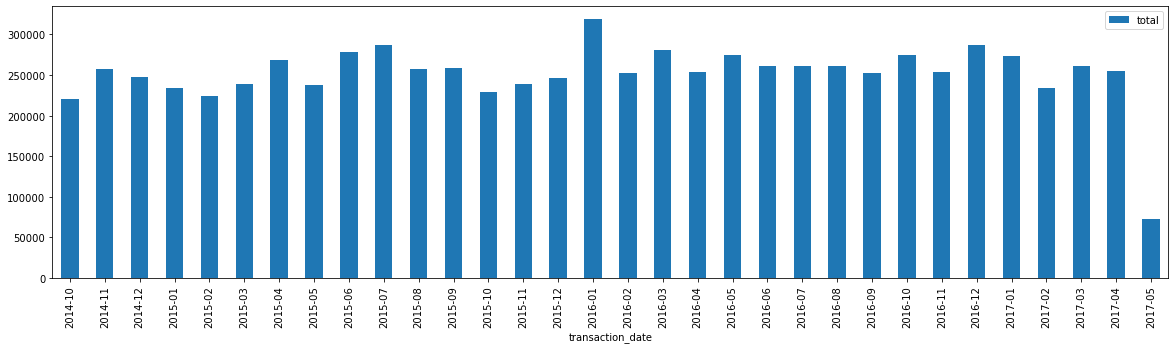

In [69]:
data.plot(kind='bar', figsize=(20,5))